In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score

In [3]:
data = pd.read_csv('customer_churn.csv')

In [5]:
print(data.shape)
data.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
#No NaN values, so that's fantastic
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen, MonthlyCharges.
- MonthlyCharges is numeric type
- Tenure is also numeric type
- Senior Citizen is categorical with values 0 and 1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


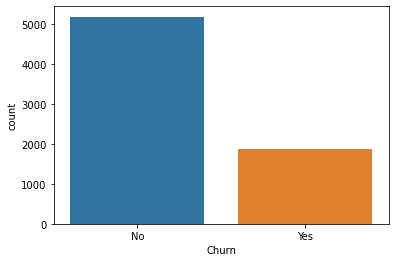

In [45]:
# Just want to get an idea before hand if there is a class imbalance in our target variable
sns.countplot(x = 'Churn', data = data);
plt.show()
#Appears to be a significant imbalance 

In [13]:
#Now doing the X-y split, as we know the target variable, and the independent variables
y = data[['Churn']]
X = data[['tenure', 'SeniorCitizen', 'MonthlyCharges']]

In [16]:
display(y.head())
display(X.head())

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70


In [17]:
#Now we will split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
#Now time to split the data into categorical and continuous/numerical
X_train_num = X_train[['tenure', 'MonthlyCharges']]
X_train_cat = X_train[['SeniorCitizen']]
X_test_num = X_test[['tenure', 'MonthlyCharges']]
X_test_cat = X_test[['SeniorCitizen']]

In [23]:
#First lets work on the numerical data
#We standardize both the train and test numerical data
transformer = StandardScaler()
transformer.fit(X_train_num)
X_train_scaled_np = transformer.transform(X_train_num)
X_train_num_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train_num.columns)
X_test_scaled_np = transformer.transform(X_test_num)
X_test_num_scaled = pd.DataFrame(X_test_scaled_np , columns=X_test_num.columns)
X_train_num_scaled.head()

,tenure,MonthlyCharges
0,-0.465683,-0.000474
1,0.885537,1.074754
2,-1.284605,-1.376499
3,-1.161766,0.177346
4,-1.325551,-0.098524


In [26]:
#Now we work on the categorical data
#I will us a onehotencoder on the Senior Citizen train and test set
#first on the train set
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()  
encoder.fit(X_train_cat)
X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names(input_features=X_train_cat.columns)

X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded, columns=cols)
X_train_cat_encoded.head()

C:\Users\ALP\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,SeniorCitizen_0,SeniorCitizen_1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [29]:
#Now we apply onehotencoder on the Test set
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()
X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded, columns=cols)
X_test_cat_encoded.head()

,SeniorCitizen_0,SeniorCitizen_1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [36]:
print(X_train_cat_encoded.shape)
print(X_test_cat_encoded.shape)
print(X_train_num_scaled.shape)
print(X_test_num_scaled.shape)

(5634, 2)
(1409, 2)
(5634, 2)
(1409, 2)


In [37]:
# Now that all transformations applied to categorical and numerical data, lets join them together
#First lets join the transformed train data
X_train_trans = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_train_trans.head()

,tenure,MonthlyCharges,SeniorCitizen_0,SeniorCitizen_1
0,-0.465683,-0.000474,1.0,0.0
1,0.885537,1.074754,1.0,0.0
2,-1.284605,-1.376499,1.0,0.0
3,-1.161766,0.177346,1.0,0.0
4,-1.325551,-0.098524,1.0,0.0


In [38]:
#Now on the transformed test data
X_test_trans = pd.concat([X_test_num_scaled, X_test_cat_encoded], axis=1)
X_test_trans.head()

,tenure,MonthlyCharges,SeniorCitizen_0,SeniorCitizen_1
0,-1.284605,-1.331629,1.0,0.0
1,0.353238,-1.316672,1.0,0.0
2,0.803645,-1.512772,1.0,0.0
3,-1.284605,0.381756,1.0,0.0
4,1.417836,-0.475768,1.0,0.0


In [39]:
# Now lets build our logistic regression model

lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_trans, y_train)

C:\Users\ALP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [47]:
y_train_pred = lr.predict(X_train_trans)
y_test_pred  = lr.predict(X_test_trans)

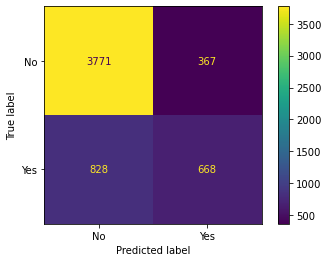

In [48]:
#Lets look at a confusion matrix of our train set
cm_train = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(cm_train,display_labels=lr.classes_);
disp.plot()
plt.show()

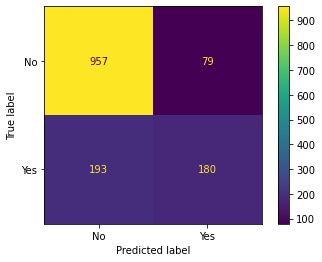

In [49]:
#Lets look at a confusion matrix of our test set
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm_test,display_labels=lr.classes_);
disp.plot()
plt.show()

In [51]:
# classification.score == accuracy of prediction
# Accuracy score = (TP + TN)/(TP + TN + FP + FN)
print("The accuracy in the TRAIN set is: {:.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The accuracy in the TEST  set is: {:.3f}".format(accuracy_score(y_test, y_test_pred)))

The accuracy in the TRAIN set is: 0.788
The accuracy in the TEST  set is: 0.807


**The accuracy is still above 70% because of the class imbalance in the Target variable. Accuracy is not suitable in an imbalanced dataset because the impact of the least represented, is reduced when compared to that of the majority class.**

In [53]:

print("The precission in the TRAIN set is: {:.3f}".format(precision_score(y_train, y_train_pred, pos_label="No")))
print("The precission in the TEST  set is: {:.3f}".format(precision_score(y_test, y_test_pred, pos_label="No")))

The precission in the TRAIN set is: 0.820
The precission in the TEST  set is: 0.832


In [54]:
print("The recall in the TRAIN set is: {:.3f}".format(recall_score(y_train, y_train_pred, pos_label="No")))
print("The recall in the TEST  set is: {:.3f}".format(recall_score(y_test,  y_test_pred, pos_label="No")))

The recall in the TRAIN set is: 0.911
The recall in the TEST  set is: 0.924


In [55]:
print("The F1-score for the TRAIN set is {:.2f}".format(f1_score(y_train,y_train_pred, pos_label="No")))
print("The F1-score for the TEST set is {:.2f}".format(f1_score(y_test,y_test_pred, pos_label="No")))

The F1-score for the TRAIN set is 0.86
The F1-score for the TEST set is 0.88


Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [56]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_trans,y_train)

In [60]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
pred = lr.predict(X_test_trans)
y_train_pred = lr.predict(X_train_trans)
y_test_pred  = lr.predict(X_test_trans)


print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_test_pred)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_test_pred, pos_label="No")))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_test_pred, pos_label="No")))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_test_pred, pos_label="No")))

The accuracy in the TEST set is: 0.75
The precision in the TEST set is: 0.90
The recall in the TEST set is: 0.74
The F1 in the TEST set is: 0.81


C:\Users\ALP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


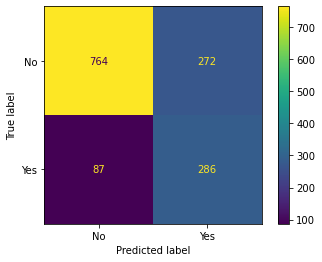

In [61]:
cm_test = confusion_matrix(y_test,y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

**In my opinion the model is slightly better at predicting the minority 'Yes' class after SMOTE. However there appears to be way more False positives and False Negatives, so depening on which we're willing to liing with, we can decide if SMOTE is the way to go or not. So in this case, if we're okay with wrongly predicting Yes, then we should go with SMOTE.**